In [1]:
#   import dependencies
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import psycopg2
from config import un
from config import pw
from config import dbn


In [2]:
#   configure the SQLAlchemy engine to interact with the database
engine = create_engine('postgresql://localhost:5432/EmployeeSQL')
connection = psycopg2.connect(user=un, password=pw, dbname=dbn)


In [3]:
#   read the 'employeeSQL' database for 'employees', unique 'titles', 'salary' information and replace NaNs
#   first get salaries
salaries_df = pd.read_sql("SELECT * FROM salaries", connection)
salaries_df.fillna(0)
salaries_df.head()
    

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


Text(0.5, 1.0, 'Distribution of Salary Ranges')

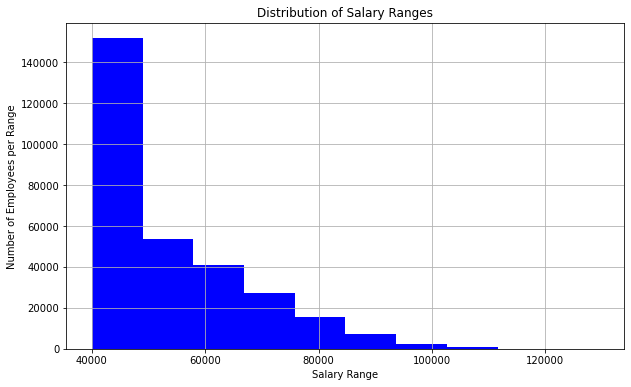

In [4]:
#   create a histogram to visualise the most common salary ranges for employees
salaries_df.hist(column='salary', figsize=[10,6], color=['blue'])
plt.xlabel('Salary Range')
plt.ylabel('Number of Employees per Range')
plt.title('Distribution of Salary Ranges')


In [5]:
#   read the 'employeeSQL' database for 'employees', unique 'titles' and 'salary' information and replace NaNs
#   next get employees
employees_df = pd.read_sql("SELECT * FROM employees", connection)
employees_df.fillna(0)
employees_df.head()


,emp_no,emp_title_id,birth_date,first_name,last_name,gender,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [6]:
#   read the 'employeeSQL' database for 'employees', unique 'titles', 'salary' information and replace NaNs
#   next get all titles from 'titles'
titles_df = pd.read_sql("SELECT * FROM titles", connection)
titles_df.fillna(0)
titles_df


,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [7]:
#   rename employee emp_title_id so that we can merge on title_id
employees_df.rename(columns={'emp_title_id': 'title_id'}, inplace=True)
employees_df.head()


,emp_no,title_id,birth_date,first_name,last_name,gender,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [8]:
#   now merge employees and titles  
employee_titles_df = pd.merge(employees_df,titles_df,on="title_id")
employee_titles_df


,emp_no,title_id,birth_date,first_name,last_name,gender,hire_date,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,Staff
...,...,...,...,...,...,...,...,...
300019,111400,m0001,1959-11-09,Arie,Staelin,M,1985-01-01,Manager
300020,111133,m0001,1955-03-16,Hauke,Zhang,M,1986-12-30,Manager
300021,110085,m0001,1959-10-28,Ebru,Alpin,M,1985-01-01,Manager
300022,110386,m0001,1953-10-04,Shem,Kieras,M,1988-10-14,Manager


In [9]:
#   now merge employees / titles with salaries  
employee_titles_salaries_df = pd.merge(employee_titles_df,salaries_df,on="emp_no")
employee_titles_salaries_df


,emp_no,title_id,birth_date,first_name,last_name,gender,hire_date,title,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,Staff,40000
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,Staff,40000
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,Staff,56087
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,Staff,87084
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,Staff,63016
...,...,...,...,...,...,...,...,...,...
300019,111400,m0001,1959-11-09,Arie,Staelin,M,1985-01-01,Manager,72446
300020,111133,m0001,1955-03-16,Hauke,Zhang,M,1986-12-30,Manager,71148
300021,110085,m0001,1959-10-28,Ebru,Alpin,M,1985-01-01,Manager,60026
300022,110386,m0001,1953-10-04,Shem,Kieras,M,1988-10-14,Manager,40000


In [10]:
#   group the salaries by title and calculate the mean for each group
grp_employee_titles_salaries_df = employee_titles_salaries_df.groupby("title").mean()
grp_employee_titles_salaries_df


,emp_no,salary
title,,
Assistant Engineer,252992.595373,48564.434447
Engineer,253654.345919,48535.336511
Manager,110780.833333,51531.041667
Senior Engineer,253038.749885,48506.799871
Senior Staff,254481.798969,58550.172704
Staff,253408.503604,58465.382850
Technique Leader,251811.432730,48582.896092


In [11]:
#   drop employee number from dataframe for final plot
final_df = grp_employee_titles_salaries_df.drop(['emp_no'], axis = 1)
final_df


,salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


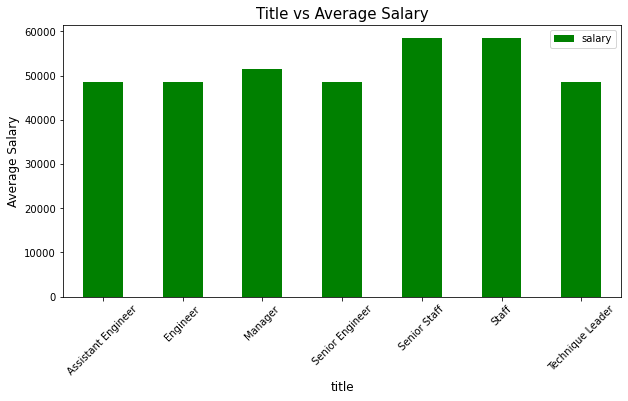

In [12]:
#   create a bar chart of average salary by title
Bar_Pandas = final_df.plot.bar(figsize=(10,5), rot=45, color=['green'])
plt.xlabel("title", fontsize=12)
plt.ylabel("Average Salary", fontsize=12)
plt.title("Title vs Average Salary", fontsize=15)
plt.savefig("Title vs Average Salary.png")



In [13]:
#   check to see what the boss was talking about
check_my_id = employees_df[employees_df['emp_no'] == 499942]
check_my_id
#   details show that I was set up and he was trying to check me out - hopefully I meet expectations!


,emp_no,title_id,birth_date,first_name,last_name,gender,hire_date
168736,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10
